In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [4]:
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Conv2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [5]:
import os
os.chdir('../input/utk-face-cropped/')
os.chdir('utkcropped')
os.chdir('utkcropped')

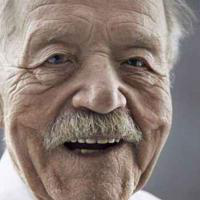

In [6]:
from PIL import Image
im =Image.open('100_0_0_20170112213500903.jpg.chip.jpg')
im

In [7]:
temp = os.listdir()
import fnmatch
dataset = fnmatch.filter(temp, '*_*_*_*')
m = len(dataset)
print(m)

23705


In [8]:
from random import shuffle
shuffle(dataset)

In [9]:
#format of labelled images
dataset[:2]

['28_1_0_20170116202056699.jpg.chip.jpg',
 '34_1_1_20170116224909263.jpg.chip.jpg']

In [71]:

ethnicity = [i.split('_')[2] for i in dataset]

In [72]:


ethnicity = list(map(int,ethnicity))

In [73]:

ethnicity_classes = to_categorical(ethnicity,num_classes=5)

In [13]:
#Resizing Images to 128 x 128
from scipy import misc
import cv2
X_data =[]
for file in dataset:
    face = cv2.imread(file)
    face = cv2.resize(face, (128, 128) )
    X_data.append(face)
X = np.squeeze(X_data)

In [15]:
#Normalizing Images
X = X.astype('float32')
X /= 255

In [16]:
(X_ethnicity_train, y_ethnicity_train), (X_ethnicity_test, y_ethnicity_test) = (X[:18000],ethnicity_classes[:18000]) , (X[18000:] , ethnicity_classes[18000:])
(X_ethnicity_valid , y_ethnicity_valid) = (X_ethnicity_test[:3000], y_ethnicity_test[:3000])
(X_ethnicity_test, y_ethnicity_test) = (X_ethnicity_test[3000:], y_ethnicity_test[3000:])

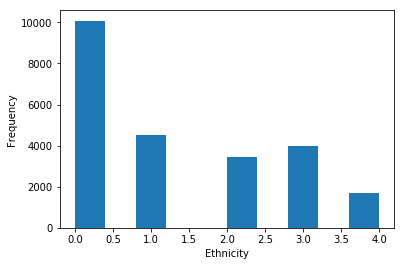

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(ethnicity)
plt.xlabel('Ethnicity')
plt.ylabel('Frequency');

In [64]:
ethnicity_model = Sequential()
ethnicity_model.add(Convolution2D(20, 5, padding='same', input_shape=(128, 128, 3)))
ethnicity_model.add(MaxPooling2D(2, 2))
ethnicity_model.add(Dropout(0.50))

ethnicity_model.add(Convolution2D(50, 5,padding='same'))
ethnicity_model.add(MaxPooling2D(2, 2))
ethnicity_model.add(Dropout(0.30))

ethnicity_model.add(Convolution2D(50, 4,padding='same',activation="relu"))
ethnicity_model.add(MaxPooling2D(2, 2))

ethnicity_model.add(Convolution2D(26, 2,padding='same'))



ethnicity_model.add(Flatten())
ethnicity_model.add(Dropout(0.50))
ethnicity_model.add(Dense(256, activation='relu'))

ethnicity_model.add(Dropout(0.30))


ethnicity_model.add(Dropout(0.30))
ethnicity_model.add(Dense(64, activation='relu'))
ethnicity_model.add(Dense(5, activation='softmax'))

In [65]:
ethnicity_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 128, 128, 20)      1520      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 64, 64, 20)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 64, 64, 20)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 50)        25050     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 50)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 50)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 50)       

In [66]:
ethnicity_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [67]:

ethnicity_history = ethnicity_model.fit(X_ethnicity_train,
         y_ethnicity_train,
         batch_size=256,
         epochs=30,
         validation_data=(X_ethnicity_valid, y_ethnicity_valid))

Train on 18000 samples, validate on 3000 samples
Epoch 1/30
18000/18000 [==============================] - 11s 619us/step - loss: 1.3880 - accuracy: 0.4502 - val_loss: 1.2407 - val_accuracy: 0.5150
Epoch 2/30
18000/18000 [==============================] - 11s 587us/step - loss: 1.1349 - accuracy: 0.5678 - val_loss: 0.9727 - val_accuracy: 0.6450
Epoch 3/30
18000/18000 [==============================] - 11s 584us/step - loss: 0.9484 - accuracy: 0.6556 - val_loss: 0.8821 - val_accuracy: 0.6873
Epoch 4/30
18000/18000 [==============================] - 11s 589us/step - loss: 0.8781 - accuracy: 0.6843 - val_loss: 0.8361 - val_accuracy: 0.7100
Epoch 5/30
18000/18000 [==============================] - 11s 589us/step - loss: 0.8356 - accuracy: 0.7013 - val_loss: 0.7872 - val_accuracy: 0.7260
Epoch 6/30
18000/18000 [==============================] - 11s 585us/step - loss: 0.7871 - accuracy: 0.7231 - val_loss: 0.7493 - val_accuracy: 0.7387
Epoch 7/30
18000/18000 [==============================] -

In [68]:
score = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test, verbose=0)

# Print test accuracy score
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.807763397693634


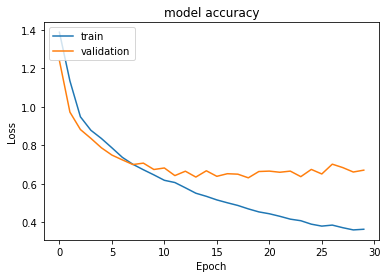

In [69]:
plt.plot(ethnicity_history.history['loss'])
plt.plot(ethnicity_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


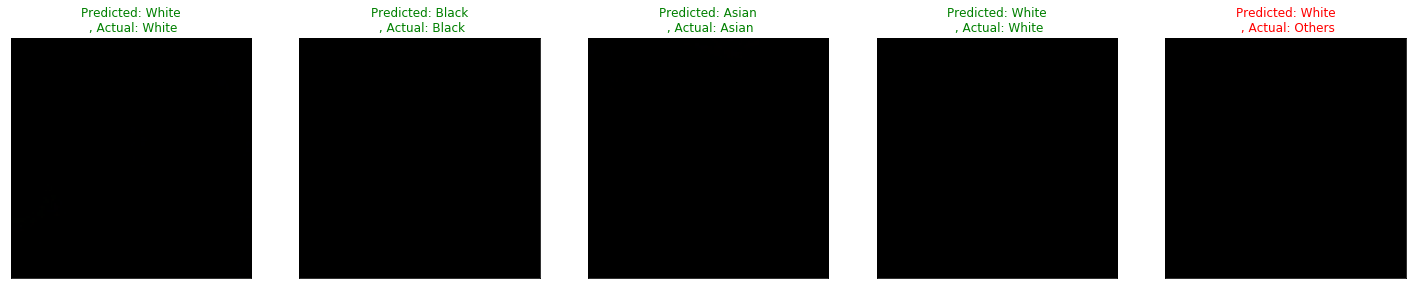

In [70]:
import matplotlib.pyplot as plt
labels = ['White','Black','Asian','Indian','Others']
figure = plt.figure(figsize=(25, 20))
y_ethnicity_pred = ethnicity_model.predict(X_ethnicity_test)
for i, index in enumerate(np.random.choice(X_ethnicity_test.shape[0], size=5, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_ethnicity_test[index]))
    predict_index = np.argmax(y_ethnicity_pred[index])
    true_index = np.argmax(y_ethnicity_test[index])
    # Set the title for each image
    ax.set_title("Predicted: {}\n , Actual: {}".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()
